## Figure pool time series

In [2]:
#import gsw as sw # Gibbs seawater package
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import xarray as xr
import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [4]:
sb_Ast = 29 # shelf break z-index Astoria
sb_Bar = 39 # shelf break z-index Barkley

ptr_fileB = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF4_BAR/01_Bar03/ptracersGlob.nc'
ptr_fileA = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/ptracersGlob.nc'

tracers = ['Tr01','Tr02','Tr03','Tr04','Tr05','Tr06','Tr07','Tr08','Tr09','Tr10']
labels = ['Linear 01','Salinty 02','Oxygen 03','Nitrate 04','Silicate 05','Phosphate 06','Nitrous Oxide 07','Methane 08',
         'DIC 09', 'Alk 10']

colours = ['#332288','#44AA99','#117733','#999933','#DDCC77','#CC6677','#882255','#AA4499', 'brown', 'tan']
sb_conc_A = np.empty(len(labels))
sb_conc_B = np.empty(len(labels))

for ii, trac in zip(range(len(tracers)),tracers):
    for pfile,sb_array, sb_ind in zip([ptr_fileB, ptr_fileA],[sb_conc_A, sb_conc_B], [sb_Ast, sb_Bar]):
        with Dataset(pfile, 'r') as nbl:
            tr_profile = nbl.variables[trac][0,:,10,180]
            sb_array[ii] = tr_profile[sb_ind]

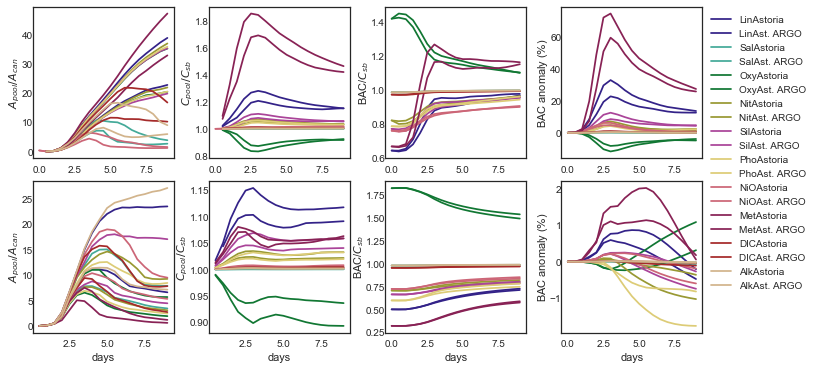

In [7]:
sns.set_style('white')
fig=plt.figure(figsize=(12,6))

gs = gspec.GridSpec(2, 4, hspace=0.15,wspace=0.25)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])
ax4 = plt.subplot(gs[4])
ax5 = plt.subplot(gs[5])
ax6 = plt.subplot(gs[6])
ax7 = plt.subplot(gs[7])
   
axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7]
nt = 19
labels_exp = ['Astoria', 'Ast. ARGO', 'Barkley', 'Bar. Path.']
labels_tra = ['Lin','Sal','Oxy','Nit','Sil','Pho','NiO','Met','DIC','Alk']
units = ['(muM)m3/s','PSU','(umol/kg)m3/s','(muM)m3/s','(muM)m3/s','muM)m3/s','(nM)m3/s',
         '(nM)m3/s','(umol/kg)m3/s','(umol/kg)m3/s']

factors = [1,1,1,1,1,1,1E-3,1E-3,1,1]


exp_files = ['../saved_calcs/pool_AST.nc',
             '../saved_calcs/pool_ARGO.nc',
             '../saved_calcs/pool_BAR.nc',
             '../saved_calcs/pool_PATH.nc']

exp_files_BAC = ['../saved_calcs/BAC_AST.nc',
                 '../saved_calcs/BAC_ARGO.nc',
                 '../saved_calcs/BAC_BAR.nc',
                 '../saved_calcs/BAC_PATH.nc']


can_Area = [1.8E8, 1.8E8, 8.7E7, 8.7E7]
sb_conc = [sb_conc_A, sb_conc_A, sb_conc_B, sb_conc_B]

for tr, unit, tr_lab, factor, ii, trac, col in zip(tracers, units, labels_tra, factors, range(len(units)),
                                                   tracers, colours):
    for file,file_bac, lab_exp, can_area, sb_c in zip(exp_files, exp_files_BAC, labels_exp, can_Area, sb_conc):
        
        with Dataset(file, 'r') as nbl:
            area = nbl.variables['area']
            conc = nbl.variables['conc']
            if can_area > 8.8E7:
                ax0.plot(np.arange(nt)/2,area[ii,:]/can_area, '-', color = col, label = tr_lab+lab_exp) 
                ax1.plot(np.arange(nt)/2,conc[ii,:]/sb_c[ii], '-', color = col, label = tr_lab+lab_exp)
            else:
                ax4.plot(np.arange(nt)/2,area[ii,:]/can_area, '-', color = col, label = tr_lab+lab_exp)
                ax5.plot(np.arange(nt)/2,conc[ii,:]/sb_c[ii], '-', color = col, label = tr_lab+lab_exp)
        
        with Dataset(file_bac,'r') as nbl:
            bac = nbl.variables['bac']
            bac_noc = nbl.variables['bac_noc']
            if can_area > 9E7:
                ax2.plot(np.arange(nt)/2,bac[ii,:]/sb_c[ii], '-', color = col, label = tr_lab+lab_exp)
                ax3.plot(np.arange(nt)/2,100*(bac[ii,:]-bac_noc[ii,:])/bac_noc[ii,:], '-',
                             color = col, label = tr_lab+lab_exp)
            else:
                ax6.plot(np.arange(nt)/2,bac[ii,:]/sb_c[ii], '-', color = col, label = tr_lab+lab_exp) 
                ax7.plot(np.arange(nt)/2,100*(bac[ii,:]-bac_noc[ii,:])/bac_noc[ii,:], '-',
                             color = col, label = tr_lab+lab_exp)

ylabels = ['$A_{pool}/A_{can}$', '$C_{pool}/C_{sb}$','BAC/$C_{sb}$', 'BAC anomaly ($\%$)' ]

for ax,ylab in zip([ax0,ax1,ax2,ax3], ylabels): 
    ax.set_ylabel(ylab)
    ax.set_ylabel(ylab, labelpad=0)
    ax.yaxis.set_tick_params(pad=0.1)
for ax,ylab in zip([ax4,ax5,ax6,ax7], ylabels): 
    ax.set_xlabel('days')
    ax.set_ylabel(ylab)
    ax.set_ylabel(ylab, labelpad=0)
    ax.yaxis.set_tick_params(pad=0)
    

ax3.legend(bbox_to_anchor=(1,1))

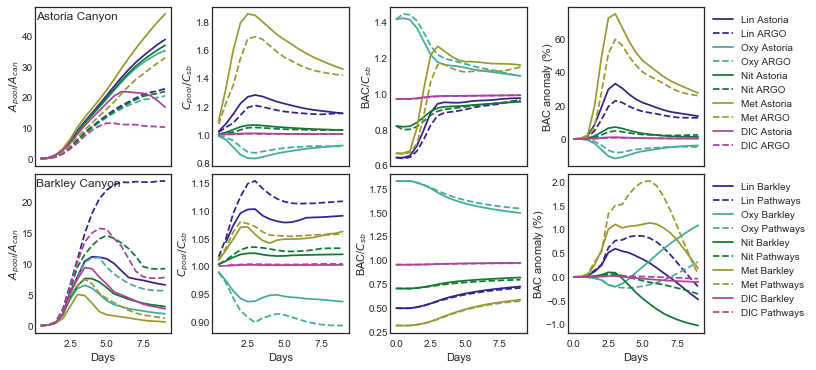

In [19]:
sns.set_style('white')
fig=plt.figure(figsize=(12,6))

gs = gspec.GridSpec(2, 4, hspace=0.05,wspace=0.3)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])
ax4 = plt.subplot(gs[4])
ax5 = plt.subplot(gs[5])
ax6 = plt.subplot(gs[6])
ax7 = plt.subplot(gs[7])
   
axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7]
nt = 19
labels_exp = ['Astoria', 'ARGO', 'Barkley', 'Pathways']
labels_tra = ['Lin','Oxy','Nit','Met','DIC']
units = ['(muM)m3/s','(umol/kg)m3/s','(muM)m3/s',
         '(nM)m3/s','(umol/kg)m3/s']


factors = [1,1,1,1E-3,1]


exp_files = ['../saved_calcs/pool_AST.nc',
             '../saved_calcs/pool_ARGO.nc',
             '../saved_calcs/pool_BAR.nc',
             '../saved_calcs/pool_PATH.nc']

exp_files_BAC = ['../saved_calcs/BAC_AST.nc',
                 '../saved_calcs/BAC_ARGO.nc',
                 '../saved_calcs/BAC_BAR.nc',
                 '../saved_calcs/BAC_PATH.nc']

colours = ['#332288','#44AA99','#117733','#999933','#AA4499','#DDCC77','#CC6677','#882255', 'brown', 'tan']

can_Area = [1.8E8, 1.8E8, 8.7E7, 8.7E7]
sb_conc = [sb_conc_A, sb_conc_A, sb_conc_B, sb_conc_B]

for tr, unit, tr_lab, factor, ii, trac, col in zip(tracers, units, labels_tra, factors, [0,2,3,7,8],
                                                   tracers, colours):
    for file,file_bac, lab_exp, can_area, sb_c in zip(exp_files, exp_files_BAC, labels_exp, can_Area, sb_conc):
        
        with Dataset(file, 'r') as nbl:
            area = nbl.variables['area']
            conc = nbl.variables['conc']
            if can_area > 8.8E7:
                if lab_exp=='Astoria':
                    ax0.plot(np.arange(nt)/2,area[ii,:]/can_area, '-', color = col, label = tr_lab+''+lab_exp) 
                    ax1.plot(np.arange(nt)/2,conc[ii,:]/sb_c[ii], '-', color = col, label = tr_lab+''+lab_exp)
                else:
                    ax0.plot(np.arange(nt)/2,area[ii,:]/can_area, '--', color = col, label = tr_lab+''+lab_exp) 
                    ax1.plot(np.arange(nt)/2,conc[ii,:]/sb_c[ii], '--', color = col, label = tr_lab+''+lab_exp)
            else:
                if lab_exp=='Barkley':
                    ax4.plot(np.arange(nt)/2,area[ii,:]/can_area, '-', color = col, label = tr_lab+''+lab_exp)
                    ax5.plot(np.arange(nt)/2,conc[ii,:]/sb_c[ii], '-', color = col, label = tr_lab+''+lab_exp)
                else:
                    ax4.plot(np.arange(nt)/2,area[ii,:]/can_area, '--', color = col, label = tr_lab+''+lab_exp)
                    ax5.plot(np.arange(nt)/2,conc[ii,:]/sb_c[ii], '--', color = col, label = tr_lab+''+lab_exp)
        
        
        with Dataset(file_bac,'r') as nbl:
            bac = nbl.variables['bac']
            bac_noc = nbl.variables['bac_noc']
            if can_area > 9E7:
                if lab_exp=='Astoria':
                    ax2.plot(np.arange(nt)/2,bac[ii,:]/sb_c[ii], '-', color = col, label = tr_lab+lab_exp)
                    ax3.plot(np.arange(nt)/2,100*(bac[ii,:]-bac_noc[ii,:])/bac_noc[ii,:], '-',
                                 color = col, label = tr_lab+' '+lab_exp)
                else:
                    ax2.plot(np.arange(nt)/2,bac[ii,:]/sb_c[ii], '--', color = col, label = tr_lab+lab_exp)
                    ax3.plot(np.arange(nt)/2,100*(bac[ii,:]-bac_noc[ii,:])/bac_noc[ii,:], '--',
                                 color = col, label = tr_lab+' '+lab_exp)
            else:
                if lab_exp=='Barkley':
                    ax6.plot(np.arange(nt)/2,bac[ii,:]/sb_c[ii], '-', color = col, label = tr_lab+lab_exp) 
                    ax7.plot(np.arange(nt)/2,100*(bac[ii,:]-bac_noc[ii,:])/bac_noc[ii,:], '-',
                                 color = col, label = tr_lab+' '+lab_exp)
                else:
                    ax6.plot(np.arange(nt)/2,bac[ii,:]/sb_c[ii], '--', color = col, label = tr_lab+lab_exp) 
                    ax7.plot(np.arange(nt)/2,100*(bac[ii,:]-bac_noc[ii,:])/bac_noc[ii,:], '--',
                                 color = col, label = tr_lab+' '+lab_exp)
                    

ylabels = ['$A_{pool}/A_{can}$', '$C_{pool}/C_{sb}$','BAC/$C_{sb}$', 'BAC anomaly ($\%$)' ]

for ax,ylab in zip([ax0,ax1,ax2,ax3], ylabels): 
    ax.set_ylabel(ylab)
    ax.set_ylabel(ylab, labelpad=0)
    ax.yaxis.set_tick_params(pad=2)
    ax.xaxis.set_ticks([])
for ax,ylab in zip([ax4,ax5,ax6,ax7], ylabels): 
    ax.set_xlabel('Days')
    ax.set_ylabel(ylab)
    ax.set_ylabel(ylab, labelpad=0)
    ax.yaxis.set_tick_params(pad=2)

ax3.legend(bbox_to_anchor=(1,1))
ax7.legend(bbox_to_anchor=(1,1))

ax0.text(0.01,0.92,'Astoria Canyon',transform=ax0.transAxes)    
ax4.text(0.01,0.92,'Barkley Canyon',transform=ax4.transAxes)    

plt.savefig('fig_pool_ts.eps',format='eps', bbox_inches='tight')